# HELOC DATA LOAN Risk Flag Prediction

HelocData is the anonymized data of Home Equity Line of Credit (HELOC) loans.
This project is to predict the risk flag ('RiskFlag') which indicates whether the loan is ever 90-day delinquent over a two-year period.

## Data Preprocessing

Before reading the csv file, it is important to note that 

**-7:** Record or No Investigation
**-8:** Usable/Valid trades or inquiries
**-9:** Condition Not Met (e.g., No Delinquencies, No enquiries)

all represent the missing information. (See HelocDataDict, SpecialValues)
For each feature, all these missing values will be simply imputed into Nan.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('HelocData.csv', na_values = [-7, -8, -9])
df.head()

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,Bad,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,NaN,...,36.0,NaN,4.0,4.0,43.0,112.0,4.0,6.0,0.0,83.0
1,Bad,66.0,502.0,4.0,145.0,34.0,0.0,0.0,97.0,36.0,...,27.0,4.0,3.0,3.0,80.0,53.0,17.0,3.0,12.0,83.0
2,Good,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,12.0,...,35.0,0.0,4.0,4.0,25.0,100.0,3.0,2.0,1.0,45.0
3,Good,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,NaN,...,33.0,0.0,4.0,4.0,2.0,11.0,12.0,2.0,1.0,57.0
4,Bad,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,NaN,...,19.0,NaN,3.0,3.0,73.0,NaN,12.0,1.0,5.0,87.0


Change the categorical label to 0 and 1.

In [2]:
df['RiskFlag'] = df['RiskFlag'].replace(['Good', 'Bad'], [1, 0])
df.head()

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,0,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,NaN,...,36.0,NaN,4.0,4.0,43.0,112.0,4.0,6.0,0.0,83.0
1,0,66.0,502.0,4.0,145.0,34.0,0.0,0.0,97.0,36.0,...,27.0,4.0,3.0,3.0,80.0,53.0,17.0,3.0,12.0,83.0
2,1,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,12.0,...,35.0,0.0,4.0,4.0,25.0,100.0,3.0,2.0,1.0,45.0
3,1,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,NaN,...,33.0,0.0,4.0,4.0,2.0,11.0,12.0,2.0,1.0,57.0
4,0,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,NaN,...,19.0,NaN,3.0,3.0,73.0,NaN,12.0,1.0,5.0,87.0


Now, let's read the explanation data dictionary. 

In [3]:
Heloc_data_dict_xls = pd.ExcelFile('HelocDataDict.xlsx')
data_dict = pd.read_excel(Heloc_data_dict_xls, 'Data Dictionary').iloc[:,:2]

data_dict

,Variable Names,Description
0,RiskFlag,Paid as negotiated flag (12-36 Months). String...
1,x1,Consolidated version of risk markers
2,x2,Months Since Oldest Trade Open
3,x3,Months Since Most Recent Trade Open
4,x4,Average Months in File
5,x5,Number Satisfactory Trades
6,x6,Number Trades 60+ Ever
7,x7,Number Trades 90+ Ever
8,x8,Percent Trades Never Delinquent
9,x9,Months Since Most Recent Delinquency


Now, let's take a look at the missing value frequencies before the actual cleaning of the data.

In [4]:
# count the missing value frequency
df_miss_num = df.iloc[:, 1:].isnull().sum()
df_total_num = df.shape[0]
df_miss_freq = df_miss_num / df_total_num                       

print(df_miss_freq.apply(lambda x: format(x, '.2%')).to_string())

x1      5.72%
x2      7.91%
x3      5.62%
x4      5.62%
x5      5.62%
x6      5.62%
x7      5.62%
x8      5.62%
x9     51.90%
x10     5.62%
x11     5.62%
x12     5.62%
x13     5.62%
x14     5.62%
x15    27.91%
x16     5.62%
x17     5.62%
x18     7.40%
x19    38.31%
x20     7.11%
x21    13.85%
x22    11.20%
x23     5.79%


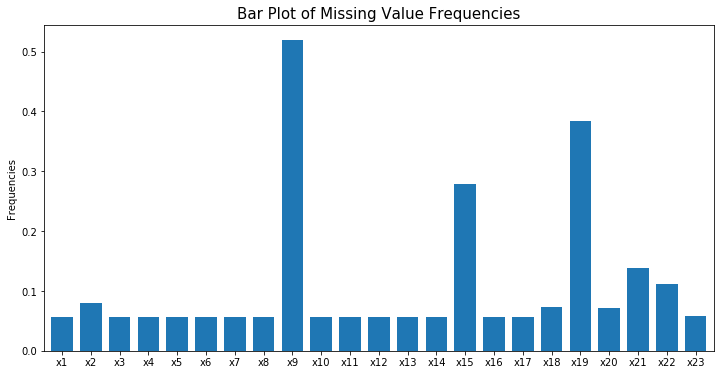

In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(12, 6))
df_miss_freq.plot.bar(width=0.75, rot=0, ax=plt.gca())
plt.ylabel('Frequencies')
plt.title('Bar Plot of Missing Value Frequencies', fontsize=15)
plt.show()

It is important to note that over half of the values of x9 are missing and therefore imputation of the values based only on existing values may contain biases (For the same reason, x15 and x19 may require other imputation methods or should be dropped).


## Deeper Interpretation of the Data

### Renaming the features

For the readability of the data, let's use the variable name in the dictionary by merging the description of the data dictionary with the raw data. 

In [6]:
var_names = data_dict['Description'][1:].str.split('(\.| \()', expand=True).iloc[:,0]
var_names

1                 Consolidated version of risk markers
2                       Months Since Oldest Trade Open
3                  Months Since Most Recent Trade Open
4                               Average Months in File
5                           Number Satisfactory Trades
6                               Number Trades 60+ Ever
7                               Number Trades 90+ Ever
8                      Percent Trades Never Delinquent
9                 Months Since Most Recent Delinquency
10              Max Delq/Public Records Last 12 Months
11                                Max Delinquency Ever
12                              Number of Total Trades
13             Number of Trades Open in Last 12 Months
14                          Percent Installment Trades
15             Months Since Most Recent Inq excl 7days
16                         Number of Inq Last 6 Months
17              Number of Inq Last 6 Months excl 7days
18                       Net Fraction Revolving Burden
19        

In [7]:
df.columns = np.concatenate((['RiskFlag'], var_names), axis=0)
df.head()

,RiskFlag,Consolidated version of risk markers,Months Since Oldest Trade Open,Months Since Most Recent Trade Open,Average Months in File,Number Satisfactory Trades,Number Trades 60+ Ever,Number Trades 90+ Ever,Percent Trades Never Delinquent,Months Since Most Recent Delinquency,...,Percent Installment Trades,Months Since Most Recent Inq excl 7days,Number of Inq Last 6 Months,Number of Inq Last 6 Months excl 7days,Net Fraction Revolving Burden,Net Fraction Installment Burden,Number Revolving Trades with Balance,Number Installment Trades with Balance,Number Bank/Natl Trades w high utilization ratio,Percent Trades with Balance
0,0,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,NaN,...,36.0,NaN,4.0,4.0,43.0,112.0,4.0,6.0,0.0,83.0
1,0,66.0,502.0,4.0,145.0,34.0,0.0,0.0,97.0,36.0,...,27.0,4.0,3.0,3.0,80.0,53.0,17.0,3.0,12.0,83.0
2,1,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,12.0,...,35.0,0.0,4.0,4.0,25.0,100.0,3.0,2.0,1.0,45.0
3,1,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,NaN,...,33.0,0.0,4.0,4.0,2.0,11.0,12.0,2.0,1.0,57.0
4,0,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,NaN,...,19.0,NaN,3.0,3.0,73.0,NaN,12.0,1.0,5.0,87.0


In [8]:
df_X = df.iloc[:,1:]
df_y = df.iloc[:,0]

df_X.head()

,Consolidated version of risk markers,Months Since Oldest Trade Open,Months Since Most Recent Trade Open,Average Months in File,Number Satisfactory Trades,Number Trades 60+ Ever,Number Trades 90+ Ever,Percent Trades Never Delinquent,Months Since Most Recent Delinquency,Max Delq/Public Records Last 12 Months,...,Percent Installment Trades,Months Since Most Recent Inq excl 7days,Number of Inq Last 6 Months,Number of Inq Last 6 Months excl 7days,Net Fraction Revolving Burden,Net Fraction Installment Burden,Number Revolving Trades with Balance,Number Installment Trades with Balance,Number Bank/Natl Trades w high utilization ratio,Percent Trades with Balance
0,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,NaN,7.0,...,36.0,NaN,4.0,4.0,43.0,112.0,4.0,6.0,0.0,83.0
1,66.0,502.0,4.0,145.0,34.0,0.0,0.0,97.0,36.0,6.0,...,27.0,4.0,3.0,3.0,80.0,53.0,17.0,3.0,12.0,83.0
2,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,12.0,6.0,...,35.0,0.0,4.0,4.0,25.0,100.0,3.0,2.0,1.0,45.0
3,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,NaN,7.0,...,33.0,0.0,4.0,4.0,2.0,11.0,12.0,2.0,1.0,57.0
4,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,NaN,7.0,...,19.0,NaN,3.0,3.0,73.0,NaN,12.0,1.0,5.0,87.0


Below is the statistic of the data.

In [9]:
data_stat = df.describe().T
data_stat

,count,mean,std,min,25%,50%,75%,max
RiskFlag,10459.0,0.478057,0.499542,0.0,0.0,0.0,1.0,1.0
Consolidated version of risk markers,9861.0,72.060440,9.871795,33.0,64.0,72.0,80.0,94.0
Months Since Oldest Trade Open,9632.0,200.769103,97.946081,2.0,135.0,186.0,257.0,803.0
Months Since Most Recent Trade Open,9871.0,9.588492,12.963398,0.0,3.0,6.0,12.0,383.0
Average Months in File,9871.0,78.778138,34.066063,4.0,57.0,76.0,97.0,383.0
Number Satisfactory Trades,9871.0,21.121467,11.321396,0.0,13.0,20.0,28.0,79.0
Number Trades 60+ Ever,9871.0,0.581400,1.238783,0.0,0.0,0.0,1.0,19.0
Number Trades 90+ Ever,9871.0,0.384763,0.993223,0.0,0.0,0.0,0.0,19.0
Percent Trades Never Delinquent,9871.0,92.359943,11.772876,0.0,89.0,97.0,100.0,100.0
Months Since Most Recent Delinquency,5031.0,21.879547,20.808514,0.0,5.0,15.0,34.0,83.0


### Data Imputation

It is important to preprocess the data so that feature extraction or feature engineering process does not result in biased or misleading results. This part includes data cleaning and data imputation with different criteria based on the nature of each feature.

As discussed earlier, **x9 (Months Since Most Recent Delinquency)** , **x15 (Months Since Most Recent Inq excl 7days)** and **x19 (Net Fraction Installment Burden)** will be dropped for having too many missing values.

In [10]:
df = df.drop(columns=['Months Since Most Recent Delinquency', 'Months Since Most Recent Inq excl 7days', 'Net Fraction Installment Burden'])
df.head()

,RiskFlag,Consolidated version of risk markers,Months Since Oldest Trade Open,Months Since Most Recent Trade Open,Average Months in File,Number Satisfactory Trades,Number Trades 60+ Ever,Number Trades 90+ Ever,Percent Trades Never Delinquent,Max Delq/Public Records Last 12 Months,...,Number of Total Trades,Number of Trades Open in Last 12 Months,Percent Installment Trades,Number of Inq Last 6 Months,Number of Inq Last 6 Months excl 7days,Net Fraction Revolving Burden,Number Revolving Trades with Balance,Number Installment Trades with Balance,Number Bank/Natl Trades w high utilization ratio,Percent Trades with Balance
0,0,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,7.0,...,22.0,4.0,36.0,4.0,4.0,43.0,4.0,6.0,0.0,83.0
1,0,66.0,502.0,4.0,145.0,34.0,0.0,0.0,97.0,6.0,...,37.0,4.0,27.0,3.0,3.0,80.0,17.0,3.0,12.0,83.0
2,1,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,6.0,...,23.0,3.0,35.0,4.0,4.0,25.0,3.0,2.0,1.0,45.0
3,1,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,7.0,...,57.0,4.0,33.0,4.0,4.0,2.0,12.0,2.0,1.0,57.0
4,0,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,7.0,...,26.0,1.0,19.0,3.0,3.0,73.0,12.0,1.0,5.0,87.0


Now, let's take a look at the distribution of the features so that more reasonable impuation methods can be selected. 

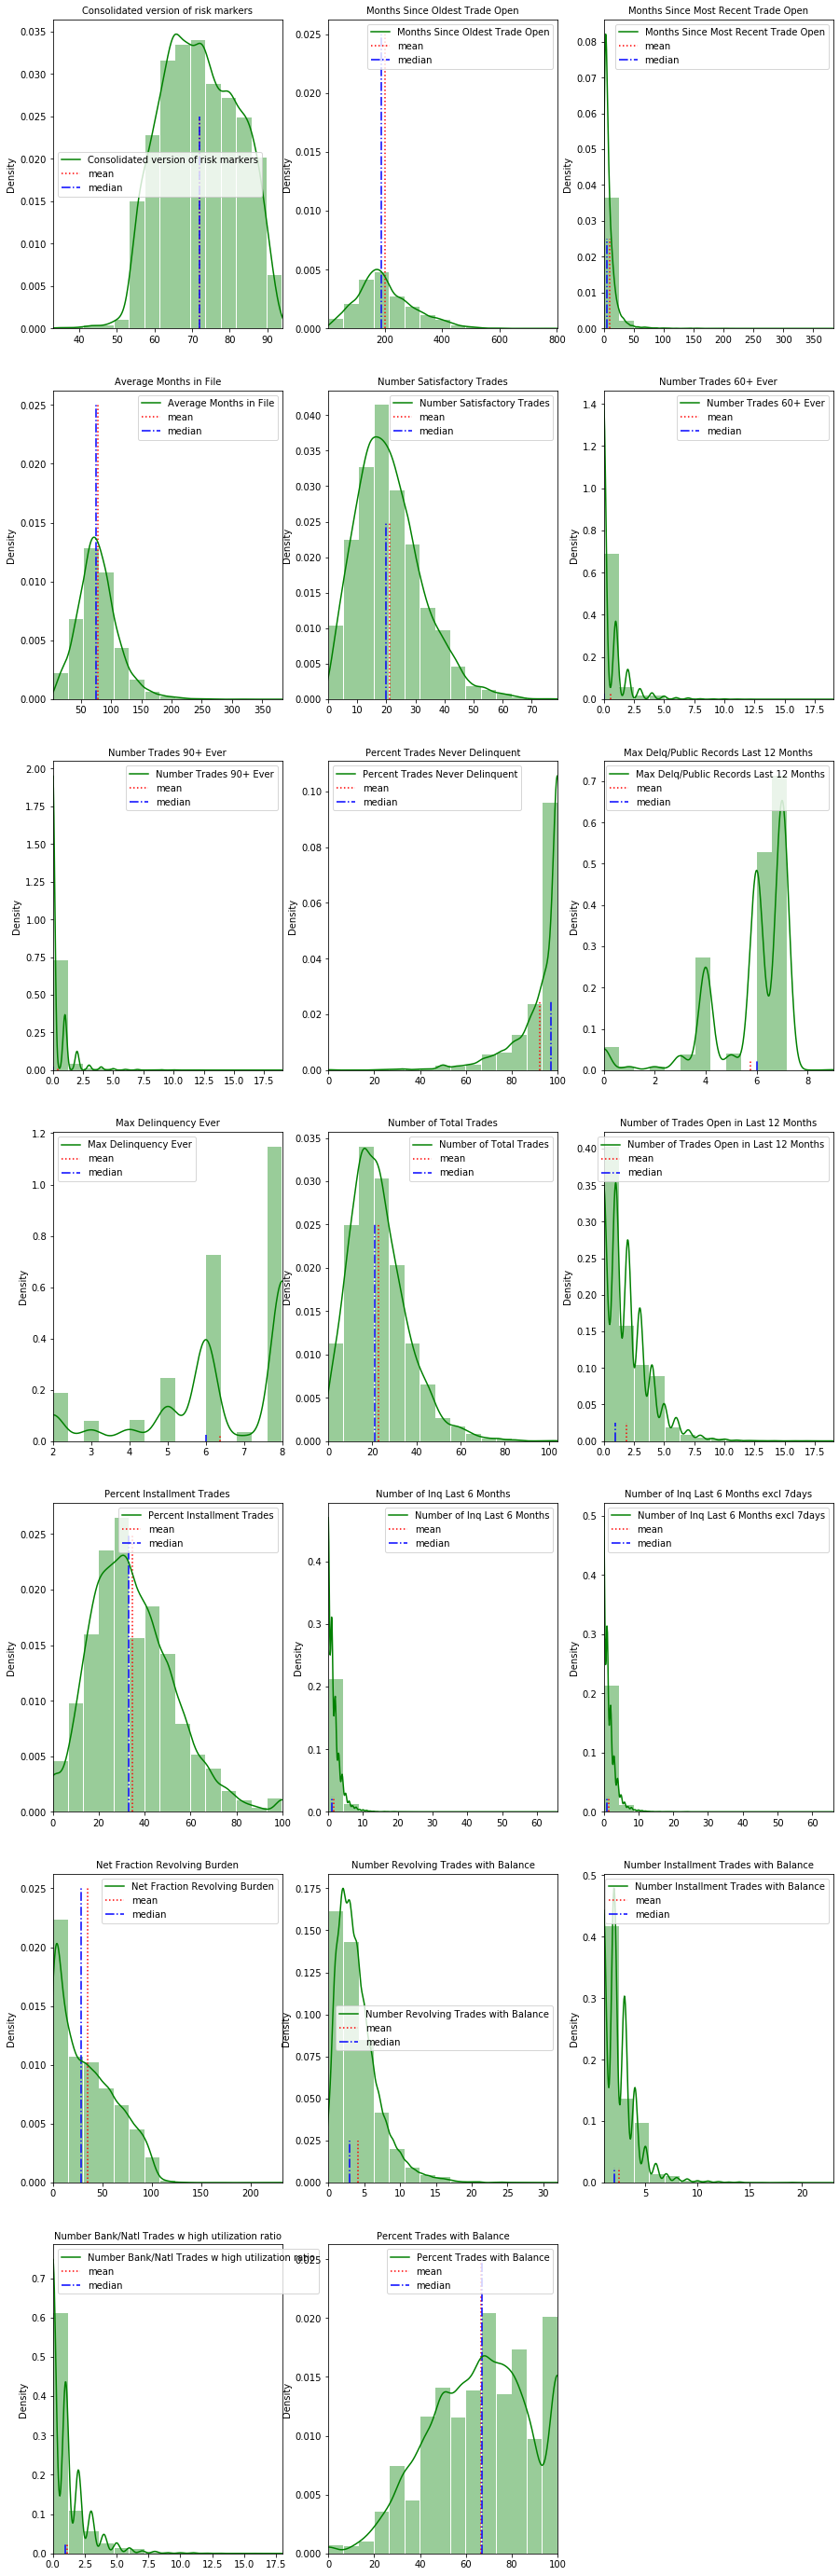

In [11]:
# histogram for three features
cols = 3
rows = (df.shape[1]-1)//cols+1

fig = plt.figure(figsize=(50, 5*rows))
for i, feature in enumerate(df.columns[1:]):
    ax = fig.add_subplot(rows,cols,i+1)
    
    df[feature].hist(bins=15, density=True, color='green', alpha=0.4, rwidth=0.95, figsize=(15,50))
    df[feature].plot(kind='density', color='green')

    # draw mean and median line
    x1 = df[feature].mean(skipna=True)
    x2 = df[feature].median(skipna=True)
    plt.vlines(x=x1,ymin=0,ymax=0.025,color='r',linestyles=':',label = 'mean')
    plt.vlines(x2,0,0.025,'b','-.',label = 'median')
    
    #range of x
    x_min = data_stat.loc[feature]['min']
    x_max = data_stat.loc[feature]['max']
    
    ax.set_title(feature, fontsize = 10)
    
    plt.legend()
    plt.xlim(x_min,x_max)

plt.show()

#### Skewed Data

There are some variables which are relatively more skewed than the others. Imputation of these features with their means may lead to biased results by filling the missing values with larger / smaller values than desired. Therefore, these values will be imputed with their medians. 

These features include:

**Right skewed**

Months Since Oldest Trade Open<br>
Number Satisfactory Trades<br>
Number of Trades Open in Last 12 Months<br>
Net Fraction Revolving Burden<br>
Number Revolving Trades with Balance<br>

**Left skewed**

Percent Trades Never Delinquent

In [12]:
from sklearn.model_selection import train_test_split

random_seed = 4

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = np.random.seed(random_seed))

df_train.shape

(8367, 21)

In [13]:
df_test.shape

(2092, 21)

In [14]:
from sklearn.impute import SimpleImputer

skewed_cols = ['Months Since Oldest Trade Open', 'Number Satisfactory Trades', 'Number of Trades Open in Last 12 Months', 
               'Net Fraction Revolving Burden', 'Number Revolving Trades with Balance']

imp = SimpleImputer(missing_values=np.nan, strategy="median")
df_train[skewed_cols] = imp.fit_transform(df_train[skewed_cols])

df_train.head()

c:\users\jae won choi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\jae won choi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,RiskFlag,Consolidated version of risk markers,Months Since Oldest Trade Open,Months Since Most Recent Trade Open,Average Months in File,Number Satisfactory Trades,Number Trades 60+ Ever,Number Trades 90+ Ever,Percent Trades Never Delinquent,Max Delq/Public Records Last 12 Months,...,Number of Total Trades,Number of Trades Open in Last 12 Months,Percent Installment Trades,Number of Inq Last 6 Months,Number of Inq Last 6 Months excl 7days,Net Fraction Revolving Burden,Number Revolving Trades with Balance,Number Installment Trades with Balance,Number Bank/Natl Trades w high utilization ratio,Percent Trades with Balance
4178,0,65.0,101.0,2.0,34.0,15.0,0.0,0.0,100.0,7.0,...,18.0,5.0,33.0,9.0,9.0,72.0,5.0,3.0,4.0,69.0
9231,0,61.0,149.0,13.0,75.0,4.0,4.0,4.0,100.0,7.0,...,8.0,0.0,50.0,0.0,0.0,30.0,3.0,2.0,NaN,100.0
9444,0,56.0,169.0,1.0,56.0,7.0,2.0,2.0,80.0,6.0,...,26.0,4.0,20.0,3.0,3.0,62.0,4.0,NaN,1.0,83.0
354,1,87.0,99.0,37.0,99.0,24.0,0.0,0.0,100.0,7.0,...,3.0,0.0,29.0,0.0,0.0,11.0,1.0,2.0,0.0,38.0
5494,1,88.0,146.0,16.0,56.0,10.0,0.0,0.0,100.0,7.0,...,13.0,0.0,10.0,0.0,0.0,16.0,1.0,NaN,0.0,17.0


#### Ordinal Data

By looking at the histogram of **x10 Max Delq/Public Records Last 12 Months** and **x11 Max Delinquency Ever**, it seems more reasonable to follow the mode of the values because the mode of the data more represents the behavioral trends of the loan for this ordinal features.

In [15]:
ordinal_cols = ['Max Delq/Public Records Last 12 Months', 'Max Delinquency Ever']

imp2 = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df_train[ordinal_cols] = imp2.fit_transform(df_train[ordinal_cols])

df_train.head()

c:\users\jae won choi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\jae won choi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,RiskFlag,Consolidated version of risk markers,Months Since Oldest Trade Open,Months Since Most Recent Trade Open,Average Months in File,Number Satisfactory Trades,Number Trades 60+ Ever,Number Trades 90+ Ever,Percent Trades Never Delinquent,Max Delq/Public Records Last 12 Months,...,Number of Total Trades,Number of Trades Open in Last 12 Months,Percent Installment Trades,Number of Inq Last 6 Months,Number of Inq Last 6 Months excl 7days,Net Fraction Revolving Burden,Number Revolving Trades with Balance,Number Installment Trades with Balance,Number Bank/Natl Trades w high utilization ratio,Percent Trades with Balance
4178,0,65.0,101.0,2.0,34.0,15.0,0.0,0.0,100.0,7.0,...,18.0,5.0,33.0,9.0,9.0,72.0,5.0,3.0,4.0,69.0
9231,0,61.0,149.0,13.0,75.0,4.0,4.0,4.0,100.0,7.0,...,8.0,0.0,50.0,0.0,0.0,30.0,3.0,2.0,NaN,100.0
9444,0,56.0,169.0,1.0,56.0,7.0,2.0,2.0,80.0,6.0,...,26.0,4.0,20.0,3.0,3.0,62.0,4.0,NaN,1.0,83.0
354,1,87.0,99.0,37.0,99.0,24.0,0.0,0.0,100.0,7.0,...,3.0,0.0,29.0,0.0,0.0,11.0,1.0,2.0,0.0,38.0
5494,1,88.0,146.0,16.0,56.0,10.0,0.0,0.0,100.0,7.0,...,13.0,0.0,10.0,0.0,0.0,16.0,1.0,NaN,0.0,17.0


For the other features, Nan values will be imputed with the mean.

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns = df_train.columns

#note that all the special columns above are already imputed. Therefore not affected in this imputation
sim_imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
df_train = pd.DataFrame(sim_imputer.fit_transform(df_train), columns = columns)

df_train.head()

,RiskFlag,Consolidated version of risk markers,Months Since Oldest Trade Open,Months Since Most Recent Trade Open,Average Months in File,Number Satisfactory Trades,Number Trades 60+ Ever,Number Trades 90+ Ever,Percent Trades Never Delinquent,Max Delq/Public Records Last 12 Months,...,Number of Total Trades,Number of Trades Open in Last 12 Months,Percent Installment Trades,Number of Inq Last 6 Months,Number of Inq Last 6 Months excl 7days,Net Fraction Revolving Burden,Number Revolving Trades with Balance,Number Installment Trades with Balance,Number Bank/Natl Trades w high utilization ratio,Percent Trades with Balance
0,0.0,65.0,101.0,2.0,34.0,15.0,0.0,0.0,100.0,7.0,...,18.0,5.0,33.0,9.0,9.0,72.0,5.0,3.000000,4.000000,69.0
1,0.0,61.0,149.0,13.0,75.0,4.0,4.0,4.0,100.0,7.0,...,8.0,0.0,50.0,0.0,0.0,30.0,3.0,2.000000,1.082584,100.0
2,0.0,56.0,169.0,1.0,56.0,7.0,2.0,2.0,80.0,6.0,...,26.0,4.0,20.0,3.0,3.0,62.0,4.0,2.475789,1.000000,83.0
3,1.0,87.0,99.0,37.0,99.0,24.0,0.0,0.0,100.0,7.0,...,3.0,0.0,29.0,0.0,0.0,11.0,1.0,2.000000,0.000000,38.0
4,1.0,88.0,146.0,16.0,56.0,10.0,0.0,0.0,100.0,7.0,...,13.0,0.0,10.0,0.0,0.0,16.0,1.0,2.475789,0.000000,17.0


### Data Exploration 

Data cleaning and imputation process has been completed. Now, for a better performance of the model and iterpretability of the data, it is essential to understand more about the data.

In [17]:
X_train, y_train = df_train.iloc[:,1:], df_train['RiskFlag']
X_train.head()

,Consolidated version of risk markers,Months Since Oldest Trade Open,Months Since Most Recent Trade Open,Average Months in File,Number Satisfactory Trades,Number Trades 60+ Ever,Number Trades 90+ Ever,Percent Trades Never Delinquent,Max Delq/Public Records Last 12 Months,Max Delinquency Ever,Number of Total Trades,Number of Trades Open in Last 12 Months,Percent Installment Trades,Number of Inq Last 6 Months,Number of Inq Last 6 Months excl 7days,Net Fraction Revolving Burden,Number Revolving Trades with Balance,Number Installment Trades with Balance,Number Bank/Natl Trades w high utilization ratio,Percent Trades with Balance
0,65.0,101.0,2.0,34.0,15.0,0.0,0.0,100.0,7.0,8.0,18.0,5.0,33.0,9.0,9.0,72.0,5.0,3.000000,4.000000,69.0
1,61.0,149.0,13.0,75.0,4.0,4.0,4.0,100.0,7.0,8.0,8.0,0.0,50.0,0.0,0.0,30.0,3.0,2.000000,1.082584,100.0
2,56.0,169.0,1.0,56.0,7.0,2.0,2.0,80.0,6.0,3.0,26.0,4.0,20.0,3.0,3.0,62.0,4.0,2.475789,1.000000,83.0
3,87.0,99.0,37.0,99.0,24.0,0.0,0.0,100.0,7.0,8.0,3.0,0.0,29.0,0.0,0.0,11.0,1.0,2.000000,0.000000,38.0
4,88.0,146.0,16.0,56.0,10.0,0.0,0.0,100.0,7.0,8.0,13.0,0.0,10.0,0.0,0.0,16.0,1.0,2.475789,0.000000,17.0


In [18]:
y_train.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: RiskFlag, dtype: float64

#### Outlier filteration

HOW TO DEAL WITH OUTLIER??

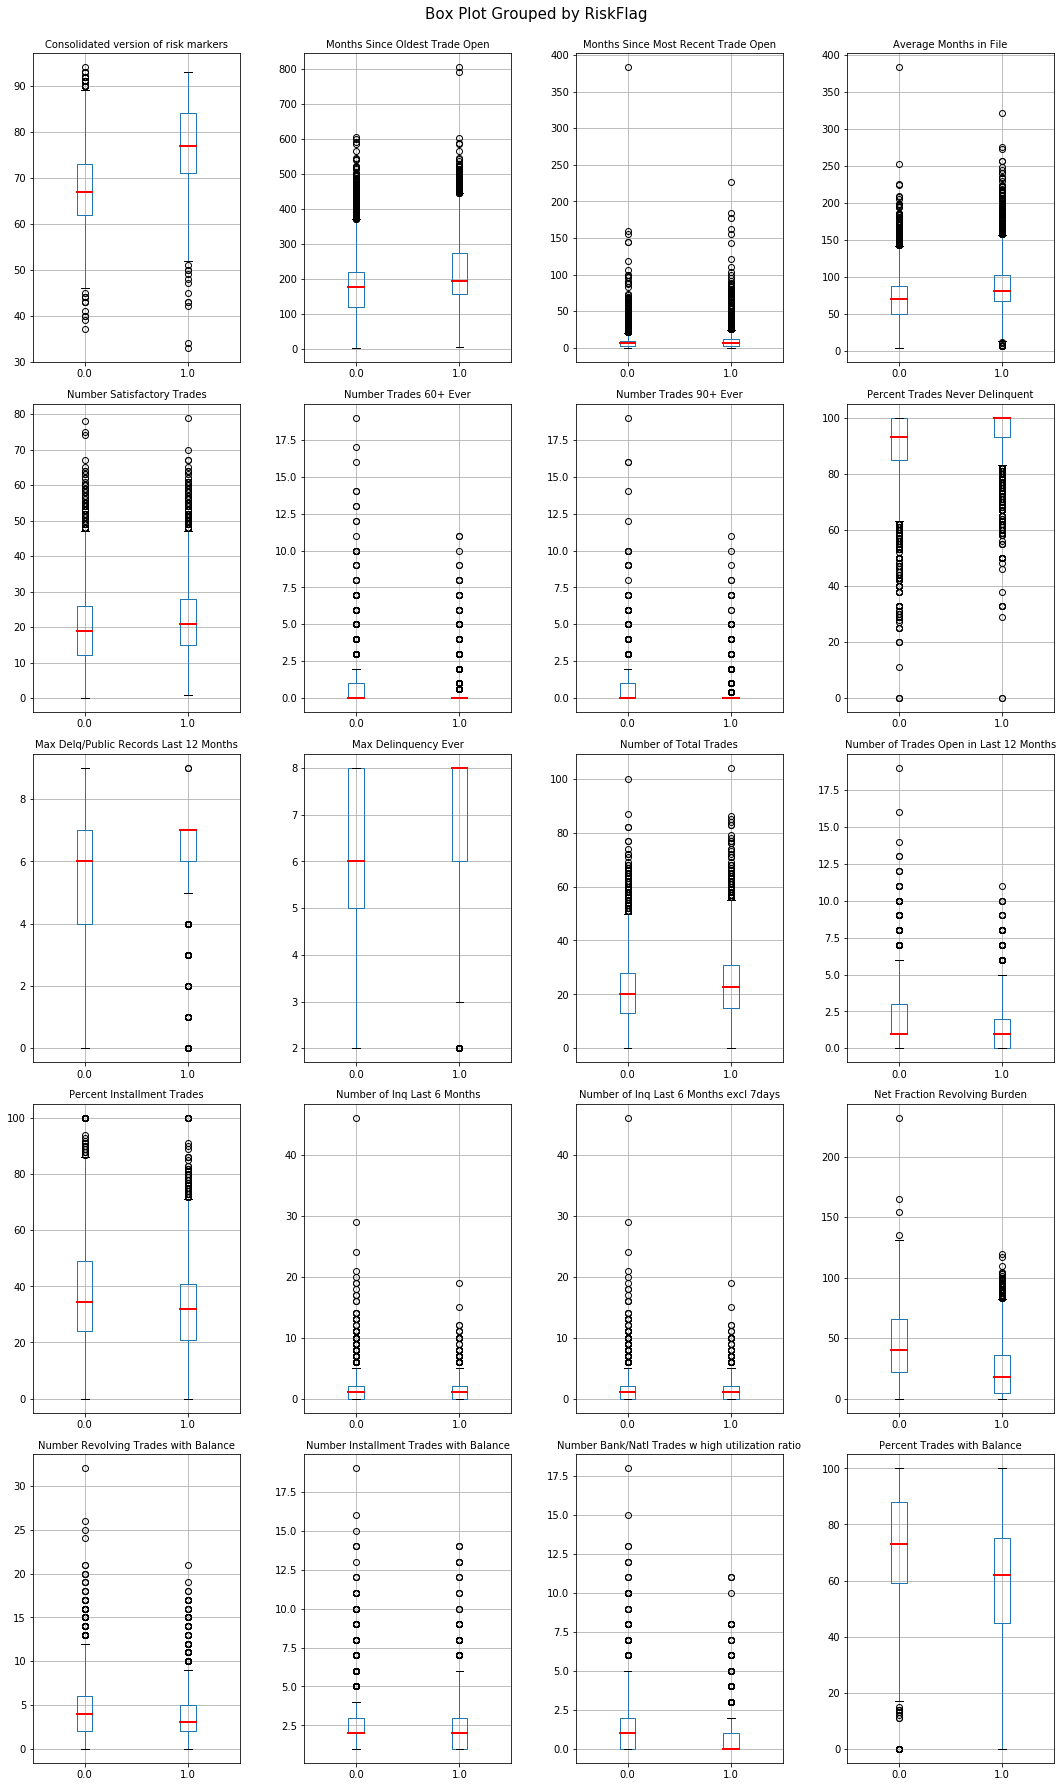

In [19]:
cols = 4
rows = (df.shape[1]-1)//cols + 1

features = df_train.columns[1:]

fig = plt.figure(figsize=(15, 5*rows))
for i, var_name in enumerate(features):
    ax = fig.add_subplot(rows,cols,i+1)
    bp = df_train.boxplot(column=var_name, by='RiskFlag',
                              ax=ax, return_type='dict')
    [value.set_color('r') for value in bp[0]['medians']] # set median line color
    [value.set_linewidth(2) for value in bp[0]['medians']] # set median linewidth

    ax.set_xlabel('')
    ax.set_title(var_name, fontsize=10)
    
plt.suptitle('Box Plot Grouped by RiskFlag', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.97]) # remove extra space
plt.show()

TO BE IMPLEMENTED MORE ...

#### Multicolinearity

To understand the data and select the meaningful and inpendent features, it is important to study the correlation of the data deeper. Below is the correlation heatmap of the data.

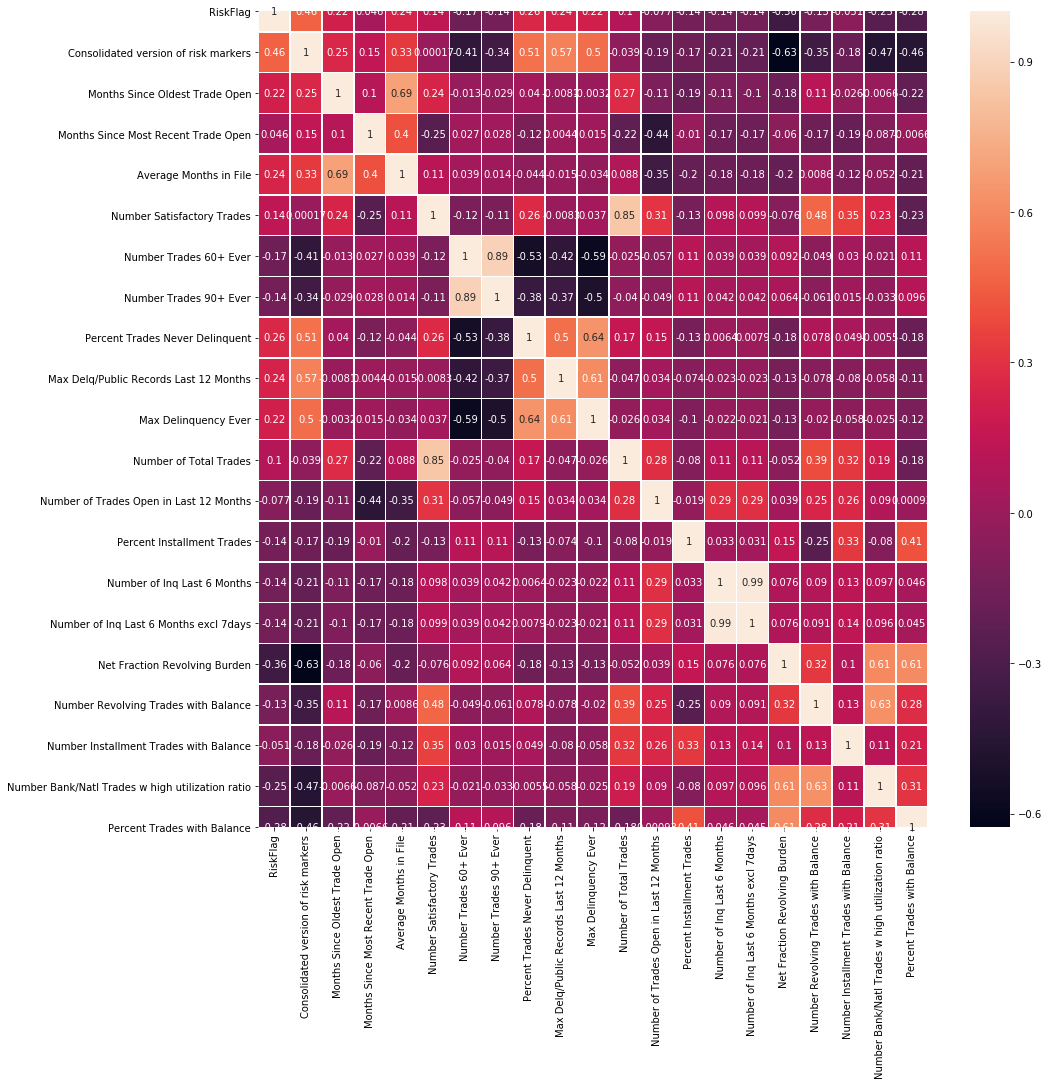

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot = True,linewidths=.5, ax=ax)

We can observe some meaningful findings from the heatmap.

(1) **Consolidated version of risk markers** is the most highly correlated features among all. <br>

(2) Consolidated version of risk markers is positively correlated with the RiskFlag (response/dependent variable). This implies that the higher the value of this feature is, the less risky the loan is.<br>

(3) Other than Consolidated version of risk markers, other features do not seem to be highly correlated with the response.<br>

(4) Meanwhile, Consolidated version of risk markers is relatively highly correleated with the other features such as "Percent Trades Never Delinquent", "Max Delq/Public Records Last 12 Months", "Max Delinquency Ever", "Net Fraction Revolving Burden", "Number Bank/Natl Trades with high utilization ratio", and "Percent Trades with Balance". It can be inferred that the Consolidated version of risks markers is calculated by the values that are correlated with these features.

(5) "Percent Trades Never Delinquent", "Max Delq/Public Records Last 12 Months", "Max Delinquency Ever" all seem to be relatively highly correlated to each other.

(6) "Number of Inq Last 6 Months" and "Number of Inq Last 6 Months excl 7 days" are highly correlated and this intuitively makes sense.

#### Consolidated version of risk markers

Based on the observations above, consolidated version of risk markers is obviously the credit score of the data instance (Considering that positively correlated with percentage of the trades never delinquent, negatively correlated with utilization ratio and revolving burden).

It is important to note that this feature is relatively highly related to the riskFlag (response) even though the features by which this feature is calculated are much less correlated with the response. This shows that devising a new features based on the existing features may help boosting up the accuracy of the model by providing more correlated feature.

Considering that Consolidated version of risk markers is the credit score and that the data is provided by the FICO, the feature can be assumed to be the FICO score of the loan calculated by the scorecard below.

<img src = "./fico_scorecard.PNG"  style="width: 350px; height: 300px">
source: FICO<br> 
https://www.fico.com/en/latest-thinking/fact-sheet/understanding-fico-scores

### Feature Engineering

#### Engineering a new feature

By assuming that the feature is calculated based on the scorecard above and correlations between the data, it can be inferred that Consolidated version of risk markers is calculated based on some values related to Ever Delinquent before (negatively affecting the score: the longer the period of delinquency, the worse the loan is), Utilization ratio, Number of months in file, Number of inquiries before, Number of trades.

Then, it can be said that the features above are already taken into account and therefore, engineering a new feature based on those variables are redundant, increase the multicolinearity between the features, and therefore decrease the interpretability of the model and the data. 

Hence, it would be more meaningful to come up with a new feature variable calculated based on the features which are less correlated to the features above.

TO BE IMPLEMENTED MORE..

#### Feature Selection

Roughly 10 features will be selected based on three standards:

**(1) Model-free feature selection** <br>
1. Univariate feature selection

**(2) Model based feature selection**<br>
1. LassoCV
2. Variable Importance (VI)

**(3) Correlation and outliers**<br>
1. Highly correlated features will not be included. (Only few will be selected)
2. Feature with too many outliers may lead a misleading result. Therefore these features may be filtered out.

**Univariate feature selection**

Univariate feature selection algorithm selects the feature based on univariate statistical tests between each of the feature and response. Espeically for univariate feature selection, 'SelectKBest' with chi-squared test will be used.

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

K_best_classifier = SelectKBest(chi2, k=10).fit(X_train, y_train)
mask = K_best_classifier.get_support(indices = True)
features_by_univariate = X_train.columns[mask]

X_train_univariate = pd.DataFrame(K_best_classifier.transform(X_train), columns = features_by_univariate)
X_train_univariate.head()

# pd.DataFrame(X_train_univariate, columns = X_train.columns[mask])

,Consolidated version of risk markers,Months Since Oldest Trade Open,Average Months in File,Number Satisfactory Trades,Number Trades 60+ Ever,Percent Trades Never Delinquent,Percent Installment Trades,Net Fraction Revolving Burden,Number Bank/Natl Trades w high utilization ratio,Percent Trades with Balance
0,65.0,101.0,34.0,15.0,0.0,100.0,33.0,72.0,4.000000,69.0
1,61.0,149.0,75.0,4.0,4.0,100.0,50.0,30.0,1.082584,100.0
2,56.0,169.0,56.0,7.0,2.0,80.0,20.0,62.0,1.000000,83.0
3,87.0,99.0,99.0,24.0,0.0,100.0,29.0,11.0,0.000000,38.0
4,88.0,146.0,56.0,10.0,0.0,100.0,10.0,16.0,0.000000,17.0


**Logistic Lasso**

LassoCV will provide the interpretable feature selection by providing how the coefficients of features can be drawn differently as the constaint parameter changes. It is also important to note to standardize the data before actually applying the Logistic Lasso.

In [22]:
#standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled =  pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns = features

X_train_scaled.head()

,Consolidated version of risk markers,Months Since Oldest Trade Open,Months Since Most Recent Trade Open,Average Months in File,Number Satisfactory Trades,Number Trades 60+ Ever,Number Trades 90+ Ever,Percent Trades Never Delinquent,Max Delq/Public Records Last 12 Months,Max Delinquency Ever,Number of Total Trades,Number of Trades Open in Last 12 Months,Percent Installment Trades,Number of Inq Last 6 Months,Number of Inq Last 6 Months excl 7days,Net Fraction Revolving Burden,Number Revolving Trades with Balance,Number Installment Trades with Balance,Number Bank/Natl Trades w high utilization ratio,Percent Trades with Balance
0,-0.731554,-1.040239,-0.601480,-1.346591,-0.554421,-0.480501,-0.397581,0.667216,0.721058,0.834695,-0.367485,1.780111,-0.091359,3.823627,3.927610,1.345289,0.339408,0.351449,2.053971,0.119847
1,-1.149268,-0.532036,0.277503,-0.107434,-1.557472,2.804865,3.702199,0.667216,0.721058,0.834695,-1.162047,-1.019127,0.885229,-0.732293,-0.715731,-0.163168,-0.354333,-0.318985,0.000000,1.574681
2,-1.671410,-0.320284,-0.681388,-0.681677,-1.283913,1.162182,1.652309,-1.070517,0.108996,-1.880449,0.268165,1.220263,-0.838161,0.786347,0.832049,0.986133,-0.007462,0.000000,-0.058142,0.776868
3,1.565871,-1.061415,2.195284,0.617927,0.266258,-0.480501,-0.397581,0.667216,0.721058,0.834695,-1.559328,-1.019127,-0.321144,-0.732293,-0.715731,-0.845565,-1.048073,-0.318985,-0.762180,-1.334987
4,1.670300,-0.563799,0.517226,-0.681677,-1.010353,-0.480501,-0.397581,0.667216,0.721058,0.834695,-0.764766,-1.019127,-1.412625,-0.732293,-0.715731,-0.665987,-1.048073,0.000000,-0.762180,-2.320520


In [23]:
from sklearn import linear_model
cv = 10
lassocv = linear_model.LassoCV(cv=cv, max_iter=5e4)
lassocv.fit(X_train_scaled, y_train)
print('alpha = %.2e' %lassocv.alpha_)

alpha = 2.26e-04


(6.873732545688046e-06,
 0.3701055733710027,
 -0.17506386094159337,
 0.18651682358627675)

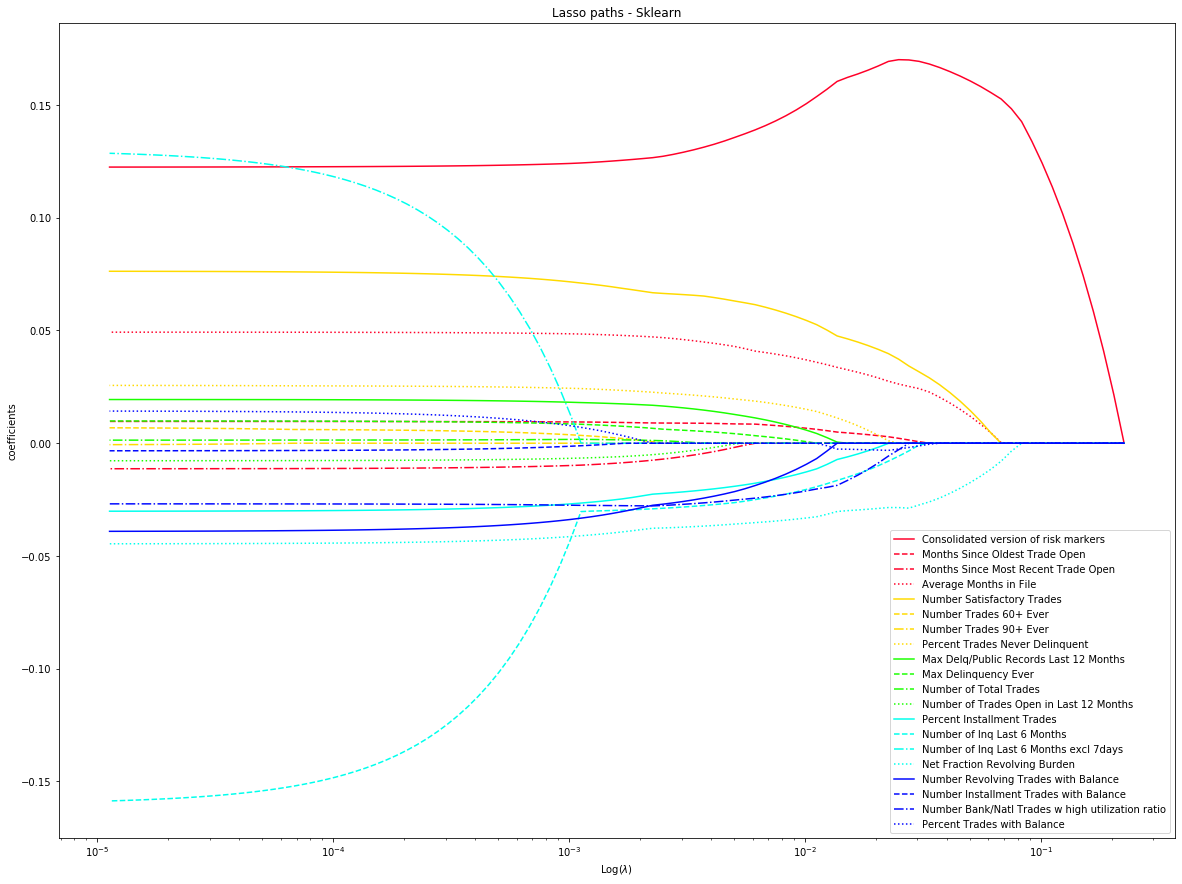

In [24]:
eps = 5e-5  # the smaller it is the longer is the path
alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X_train_scaled, y_train, eps, fit_intercept=False)

plt.figure(figsize = (20,15))

NUM_COLORS = 21
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)
cm = plt.get_cmap('gist_rainbow')

for i in range(X_train_scaled.shape[1]):    
    lines = plt.plot(alphas_lasso, coefs_lasso[i], label = X_train_scaled.columns[i])
    lines[0].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
    lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])
    
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

It can be seen that as the constraint parameter (lambda) decreases, coefficients of different features start to have meaningful values of coefficients.

Notable feature is "Consolidated version of risk markers" which is re-confirmed as the most important feature as in the previous correlation analysis. It can be observed that each time the new feature starts to have its effect as lambda changes, "Consolidated version of risk markers" change trend in its graph. It can be inferred that when the feature that is highly correlated with this feature, the feature may change because newly introduced variable also explains the response that has been previously explained by Consolidated version of risk markers. The graph seems to show the most drastic change at the moment when "Number Bank/Nati Trades with high utilization ratio" and "Percent Trades Never Delinquent" are introduced. This can be explained by the high correlation between these two features and "Consolidated version of risk markers" (See Correlation heatmap above - these two features are most highly correlated).

Furthermore, there is a wide U-shaped curve when the log(lambda) value is 10E-3 generated by two dotted light blue lines.  These two features are "Number of Inq Last 6 Months", "Number of Inq Last 6 Months excl 7 days". Intuitively, these two are directly correlated and can be checked in the correlation heatmap as well. Therefore, only one feature, "Number of Inq Last 6 Months" will be selected.

Another interesting observation is that "Percent Trades with Balance" begins to have value and then moves back to value of 0 at the moment "Max Delinquency Ever" begins to have effect, and after a while it begins to have effect again. (ADD MORE DETAIL)

According to the analysis of the graph, features are selected in descending order of importance as follows:

In [39]:
features_by_lasso = ["Consolidated version of risk markers", "Net Fraction Revolving Burden", "Number Satisfactory Trades", 
                     "Average Months in File", "Number of Inq Last 6 Months", "Number Bank/Natl Trades w high utilization ratio",
                     "Months Since Oldest Trade Open", "Percent Trades Never Delinquent", "Max Delq/Public Records Last 12 Months",
                     "Max Delinquency Ever"]

X_train_lasso = X_train[features_by_lasso]
X_train_lasso.head()

,Consolidated version of risk markers,Net Fraction Revolving Burden,Number Satisfactory Trades,Average Months in File,Number of Inq Last 6 Months,Number Bank/Natl Trades w high utilization ratio,Months Since Oldest Trade Open,Percent Trades Never Delinquent,Max Delq/Public Records Last 12 Months,Max Delinquency Ever
0,65.0,72.0,15.0,34.0,9.0,4.000000,101.0,100.0,7.0,8.0
1,61.0,30.0,4.0,75.0,0.0,1.082584,149.0,100.0,7.0,8.0
2,56.0,62.0,7.0,56.0,3.0,1.000000,169.0,80.0,6.0,3.0
3,87.0,11.0,24.0,99.0,0.0,0.000000,99.0,100.0,7.0,8.0
4,88.0,16.0,10.0,56.0,0.0,0.000000,146.0,100.0,7.0,8.0


**Variable Importance (VI)**

Variable importance can be evaluated by the metric score variation caused by the feature value permutation. XGBoost model will be used to further leverage on permutation object.

In [51]:
# fit a XGBoost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
from sklearn.metrics import accuracy_score

y_pred = xgb_clf.predict(X_train)
print("training accuracy by xgboost", accuracy_score(y_pred, y_train))

training accuracy by xgboost 0.745069917533166


In [31]:
features

Index(['Consolidated version of risk markers',
       'Months Since Oldest Trade Open', 'Months Since Most Recent Trade Open',
       'Average Months in File', 'Number Satisfactory Trades',
       'Number Trades 60+ Ever', 'Number Trades 90+ Ever',
       'Percent Trades Never Delinquent',
       'Max Delq/Public Records Last 12 Months', 'Max Delinquency Ever',
       'Number of Total Trades', 'Number of Trades Open in Last 12 Months',
       'Percent Installment Trades', 'Number of Inq Last 6 Months',
       'Number of Inq Last 6 Months excl 7days',
       'Net Fraction Revolving Burden', 'Number Revolving Trades with Balance',
       'Number Installment Trades with Balance',
       'Number Bank/Natl Trades w high utilization ratio',
       'Percent Trades with Balance'],
      dtype='object')

In [32]:
import eli5
from eli5.sklearn import PermutationImportance

# define a permutation importance object
perm = PermutationImportance(xgb_clf).fit(X_train, y_train)
# show the importance
eli5.show_weights(perm, feature_names= np.array(features) )

Weight,Feature
0.0727 ± 0.0055,Consolidated version of risk markers
0.0141 ± 0.0032,Number Satisfactory Trades
0.0135 ± 0.0008,Average Months in File
0.0076 ± 0.0045,Percent Trades Never Delinquent
0.0050 ± 0.0043,Net Fraction Revolving Burden
0.0044 ± 0.0010,Months Since Oldest Trade Open
0.0036 ± 0.0021,Percent Installment Trades
0.0036 ± 0.0014,Percent Trades with Balance
0.0031 ± 0.0027,Number Revolving Trades with Balance
0.0026 ± 0.0024,Number of Inq Last 6 Months


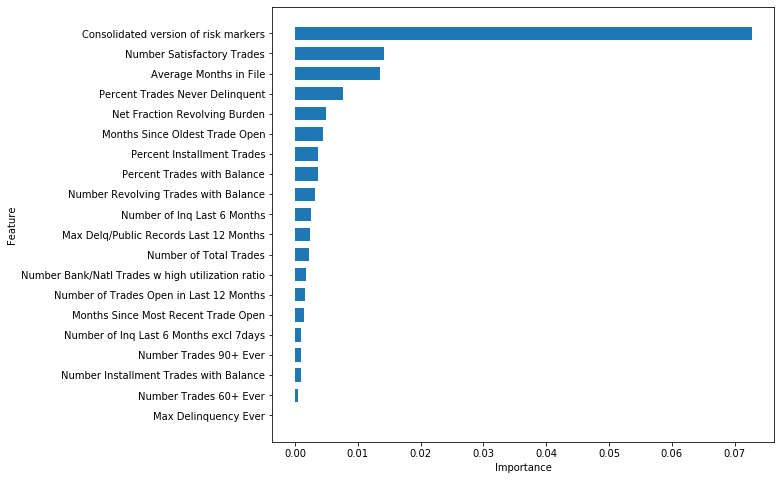

In [37]:
# importance in decreasing order
imp_ord = np.argsort(perm.feature_importances_)

plt.figure(figsize=(9,8))
yaxis = np.arange(len(perm.feature_importances_))*1.2
plt.barh(y = yaxis,width = perm.feature_importances_[imp_ord])
plt.yticks(yaxis,np.array(features)[imp_ord])
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

It can be observed that the feature rankings are different from other two methods. Important features selected by tree-based selection include features as follows:

In [40]:
features_by_tree = ["Consolidated version of risk markers", "Number Satisfactory Trades", "Average Months in File",
                    "Percent Trades Never Delinquent", "Net Fraction Revolving Burden", "Months Since Oldest Trade Open",
                    "Percent Installment Trades", "Percent Trades with Balance", "Number Revolving Trades with Balance",
                    "Number of Inq Last 6 Months"]

X_train_tree = X_train[features_by_tree]
X_train_tree.head()

,Consolidated version of risk markers,Number Satisfactory Trades,Average Months in File,Percent Trades Never Delinquent,Net Fraction Revolving Burden,Months Since Oldest Trade Open,Percent Installment Trades,Percent Trades with Balance,Number Revolving Trades with Balance,Number of Inq Last 6 Months
0,65.0,15.0,34.0,100.0,72.0,101.0,33.0,69.0,5.0,9.0
1,61.0,4.0,75.0,100.0,30.0,149.0,50.0,100.0,3.0,0.0
2,56.0,7.0,56.0,80.0,62.0,169.0,20.0,83.0,4.0,3.0
3,87.0,24.0,99.0,100.0,11.0,99.0,29.0,38.0,1.0,0.0
4,88.0,10.0,56.0,100.0,16.0,146.0,10.0,17.0,1.0,0.0
